In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Read in clean DB from EDA - Part One
glassdoorDB = pd.read_csv('/Users/kershtheva/Desktop/MolecularBioSalary_Prediction/glassdoorDB_postEDA.csv')


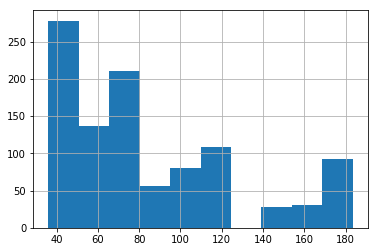

In [8]:
#Look at salary histograms 
salary = glassdoorDB['Mean Salary'].sort_values(ascending=False)
salary.hist()


In [9]:
glassdoorDB.columns

Index([u'Unnamed: 0', u'Job Description', u'Job Title', u'Rating', u'Revenue',
       u'Min Salary', u'Max Salary', u'Mean Salary', u'Company Age', u'Size'],
      dtype='object')

In [11]:
#remove extraneous columns - glassdoorDB Reset for experiments 
glassdoorDBSimple = glassdoorDB.drop(columns = ['Unnamed: 0'], axis=1)


In [12]:
def phraseFinder(df, series, phraselist):
    '''
    Takes a list of phrases and looks for the number of instances of that phrase in a dataframe series
    
    Input: 
        df -> dataFrame with series of interest
        series -> name of the series; assumes name is passed as string
        phraselist -> list of phrases; assumes each phrase is a string and lowercase
        
    Output:
        Returns dataframe with each phrase in phrase list and their count, sorted in descending order
    '''
    #Make copy of df to avoid changing original    
    dfCopy = df.copy()
    
    #Initialize list of counts for each phrase and name of each phrase
    phraseCount = []
    phrases = []
    
    #iterate through phrases
    for phrase in phraseList:        
        dfCopy['Count'] = dfCopy[series].apply(lambda x: 1 if phrase in x.lower() else 0)
        phrases.append(phrase)
        phraseCount.append(dfCopy['Count'].sum())
    
    phraseDict = pd.DataFrame({'Phrase': phrases , 'Count Fraction': phraseCount})
    return phraseDict.sort_values(by='Count Fraction', ascending=False)

phraseList = ['years of','years', ' yr ', ' yrs ',
              'experience',
              'phd', 'ph.d',
              'm.s', 'master',
              'bsc', 'b.s', 'bachelor',
              'python', 
              'microsoft', 'ms office', ' ms ',
              'programming',
              'engineer',
              'leader',
              'responsible', 
              'manage', 
              'vp',
              'postdoctor', 
              'director',
              'cancer',
              ' rna', 
              ' dna',
              'metabolism',
              'protein', 
              'biochemistry', 
              'genetic', 
              'healthcare', 
              'drug',
              'm.d', 
              'cloning', 
              'collaborative', 
              'associate', 'technician', 
              'analyst', 
              'scientist i', 
              'scientist ii', 
              'senior', 
              'entry', 
              'junior', 
              'qc'
             ]

phraseFinder(glassdoorDBSimple, 'Job Description', phraseList)


,Count Fraction,Phrase
4,1003,experience
1,838,years
20,587,manage
0,555,years of
36,446,associate
30,420,genetic
29,412,biochemistry
32,386,drug
19,374,responsible
28,369,protein


In [13]:
glassdoorDBSimple.columns

Index([u'Job Description', u'Job Title', u'Rating', u'Revenue', u'Min Salary',
       u'Max Salary', u'Mean Salary', u'Company Age', u'Size'],
      dtype='object')

In [15]:
def yearsOfExperience(df, series, yearsList): 
    '''
    Finds a list of numbers associated with years/years of experience 
    in a job description. 
    
    Input: 
    Df -> Dataframe with job description
    Series -> Series name associated with job description; assumes string 
    yearsList -> List of strings with word to look for 
    
    Output:
    1D DataFrame where each row has a list of words and numbers surrounding the word from yearsList
    
    '''
    #Initializing list of lists, where every element represents a series row
    seriesList = []
    
    #search through every row of the series
    for ix in df[series]:  
        paragraph = ix.split()
        
        #sublist for seriesList
        paragraphList = []
        
    #search through terms in yearsList
        for term in yearsList:
            indices = (i for i, word in enumerate(paragraph) if word==term)
            
            #Make indexList and add it to the current paragraph list  
            for ind in indices: 
                indList = paragraph[ind-5:ind]+paragraph[ind:ind+5]
                paragraphList = paragraphList + indList
                #paragraphList.append(indList)
                #print(len(paragraphList))
                
        #Append paragraphList to seriesList for everyrow
        seriesList.append(paragraphList)
    
    wordFrame = pd.DataFrame({'Word Range': seriesList})
    return wordFrame

                
yearsList = ['experience','years', ' yr ', ' yrs ']
wordRange = yearsOfExperience(glassdoorDBSimple, 'Job Description', yearsList)

In [17]:
wordRange['Word Range'].head(20)

0     [3+, years, of, relevant, research, experience...
1     [with, a, minimum, of, 2, years, of, relevant,...
2     [of, 2, years, of, lab, experience, OR, •Maste...
3     [aseptic, techniques, preferred., •, GMP, expe...
4     [to, a, candidate, with, previous, experience,...
5     [preferred, with, 2, years, relevant, experien...
6     [tests, is, a, plus, Hands-on, experience, wit...
7     [candidate, a, broad, range, of, experience, a...
8     [degree, with, 6+, years, of, experience, or, ...
9     [years, of, full-time,, hands-on, NGS, experie...
10    [preferred., Preferably, one, or, more, years,...
11    [Minimum, of, 2, years, monitoring, experience...
12    [Compensation:, Commensurate, with, skills, an...
13    [on, oligonucleotides., Key, Responsibilities:...
14    [least, 3, years, of, post-degree, experience,...
15    [related, field., Minimum, 4, years’, experien...
16    [microbiology,, and, molecular, biology., Hand...
17    [organized,, flexible, and, preferably, ha

In [16]:
def minMaxYears(dataFrame, series, minYears, maxYears): 
    '''
    Finds the minimum and maximum number of years of experience needed for a particular job in a Dataframe 
    
    Input: 
    dataFrame -> A dataFrame of interest
    series -> A series name from dataFrame, assumes this is a string
    minYears -> The smallest number of years to look for
    maxYears -> The largest number of years to look for
    
    If there is only one number in the row, we will assume this is the minimum number of years and max years
    
    Output:
    DataFrame with two columns and int type values: Min Experience, Max Experience
    
    '''
    yearsList = list(range(minYears, maxYears+1))
    
    #Initialize lists
    minValList = []
    maxValList = []

    #Iterate through dataframe rows
    for row in dataFrame[series]:
        
        #only look for maxVal when minvalFound becomes true
        minValFound = False
        
        #make all the list items into one string to make iteration simpler
        rowEntry = " ".join(row)
        rowEntry = rowEntry.replace('+','')
    
        #Iterate through yearsList from smallest to largest             
        for year in yearsList:
            
            #set the year to a string to iterate through rowEntry
            yearString = str(year)
            
            if minValFound != True and yearString in rowEntry:
                minVal = year
                minValList.append(year)
                maxVal = year 
                minValFound = True
                
            else:
                continue
        
        if minValFound == False: 
            minValList.append(0)
            maxVal = 0
            
        #Once min is done, look for maxVal
        if minValFound == True:
            for year in range(minVal, len(yearsList)): 
                yearString = str(year)
                
                if yearString in rowEntry: 
                    maxVal = year 

                else:
                    continue
                         
        maxValList.append(maxVal)
    
    #Once all rows are done, make the columns.
    minMaxDB = pd.DataFrame({'Min. Experience': minValList, 'Max. Experience': maxValList})
    return minMaxDB


minMaxDB = minMaxYears(wordRange, 'Word Range', 0, 10)

In [18]:
#Join glassdoorDBIntermediate + minMaxDB
glassdoorDBFinal = glassdoorDBSimple.join(minMaxDB)


In [19]:
glassdoorDBFinal.head()

,Job Description,Job Title,Rating,Revenue,Min Salary,Max Salary,Mean Salary,Company Age,Size,Max. Experience,Min. Experience
0,ArsenalBio’s mission is to develop efficacious...,Scientist - Molecular Biology,5.0,0,67,135,101.0,1,51,3,3
1,GreenLight Biosciences is seeking an exception...,"Scientist, Molecular Biology",3.9,1,67,135,101.0,12,51,2,2
2,"Since 2001, Hygiena has been on a mission to b...",R&D Scientist,3.9,500,67,135,101.0,0,201,5,2
3,Known for its scientific and operational excel...,QC Virology Analyst,3.9,10000,67,135,101.0,32,5001,1,1
4,Howard Hughes Medical Institute (HHMI) is an i...,Research Specialist - Torii Lab,4.3,5000,67,135,101.0,67,1001,5,5


In [20]:
#Replace 0's and NaNs with the median 
maxMean = glassdoorDBFinal['Max. Experience'].median()
minMean = glassdoorDBFinal['Min. Experience'].median()

glassdoorDBFinal['Min. Experience'] = glassdoorDBFinal['Min. Experience'].apply(lambda x: minMean if x==0 else x)
glassdoorDBFinal['Min. Experience'] = glassdoorDBFinal['Min. Experience'].fillna(value=minMean)

glassdoorDBFinal['Max. Experience'] = glassdoorDBFinal['Max. Experience'].apply(lambda x: maxMean if x==0 else x)
glassdoorDBFinal['Max. Experience'] = glassdoorDBFinal['Max. Experience'].fillna(value=maxMean)


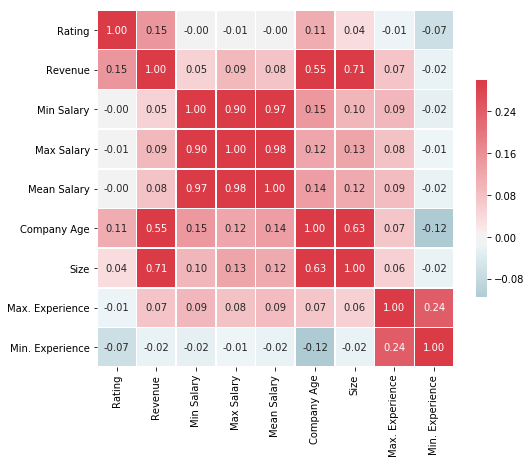

In [21]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = glassdoorDBFinal.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8,8))
# Draw the heatmap with the mask and correct aspect ratio
corrMap = sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='0.2f')


In [22]:
def phraseCounter(df, series, phraseList, newSeriesName):
    '''
    Takes a list of phrases and returns a 1 or 0 if the phrase is found in the series
    
    Input: 
        df -> dataFrame with series of interest
        series -> name of the series; assumes name is passed as string
        phraselist -> list of phrases; assumes each phrase is a string and lowercase
        newSeriesName -> new series name for series to join with original dfl assumes name is passed as string
        
    Output:
        Returns extended dataframe with a 1 or 0 in each row depending on whether the phrase is found in the entry
        Will fill NaN values with 0 
    '''
    #Make copy of df to avoid changing original    
    dfCopy = df.copy()
    countList = []
    
    #Iterate through the rows
    for row in dfCopy[series]:
        
        #default value is 0
        row = row.lower()
        counter = 0
      
        #iterate through the phraseList
        for phrase in phraseList: 
            
            #change counter if the phrase is found
            if phrase in row:
                counter = 1
            
            else:
                continue
        
        countList.append(counter)
        
    newSeries = pd.DataFrame({newSeriesName: countList})
    newDB = df.join(newSeries)
    newDB[newSeriesName] = newDB[newSeriesName].fillna(value=0)

    return newDB
    

In [24]:
def dictPhraseCounter(df, series, searchDict):
    '''
    Looks through a provided dictionary of keys and values, assuming each value is a list
    
    Input: 
    df -> Original dataFrame
    series -> The series in the original dataFrame to look for
    searchDict -> Keys are the series Name, and values are the phraseList; can also be just be individual string
    '''
    for key in searchDict.keys():       
        df = phraseCounter(df, series, searchDict[key], key)
    return df

exampleDict = {'Lead': ['lead'],
               'Manage': ['manage'], 'Employees': ['employee'],
               'Genetic': ['genetic'],
               'Biochemistry': ['biochemistry'],
               'RNA': ['rna'], 'DNA': ['dna'], 'Protein': ['protein'],
               'Crystallography': ['crystal'], 'No Experience': ['0-'],
               'Cancer': ['cancer'], 'Immunology': ['immun'], 'Therapy': ['therapy'],
               'BSc': ['bachelor', 'b.s.', 'bsc'], 
              'MSc': ['master', 'm.s'], 
              'PhD':['phd', 'ph.d'],
              'ML': ['machine learning'],
              'Postdoctoral': ['postdoctor'],
              'Python': ['python'], 
              }

glassdoorDBFinal2 = dictPhraseCounter(glassdoorDBFinal, 'Job Description', exampleDict)



In [25]:
#Create a dictionary of new series names and a list of values for all 19 terms
jobDict = {'VP': ['vp'], 
           'Vice President': ['vice president'], 
           'I': [' i'], 
           'II': [' ii'],  
           'Principal': ['principal'],
           'Manager': ['manage'],
           'Investigator': ['investigat'],
           'Researcher': ['research'],
           'Supervisor': ['supervisor'],
           'Director': ['director'],
           'Associate': ['associate'],
           'Technologist': ['technolo'], 
           'Fellow': ['fellow'],
           'Technician': ['technic'],
           'Analyst': ['analyst'],
           'Scientist I': ['scientist i'],
           'Scientist II': ['scientist ii'],
           'Scientist':[ 'scientist'],
           'Senior': ['senior', 'sr.'],
           'Engineer': ['engineer'],
           'QC':['qc', 'quality control'], 
           'Principal': ['principal'], 
           'Virologist': ['virologist']       
          }


In [26]:
#look for words in job title
glassdoorDBFinal2 = dictPhraseCounter(glassdoorDBFinal2, 'Job Title', jobDict)


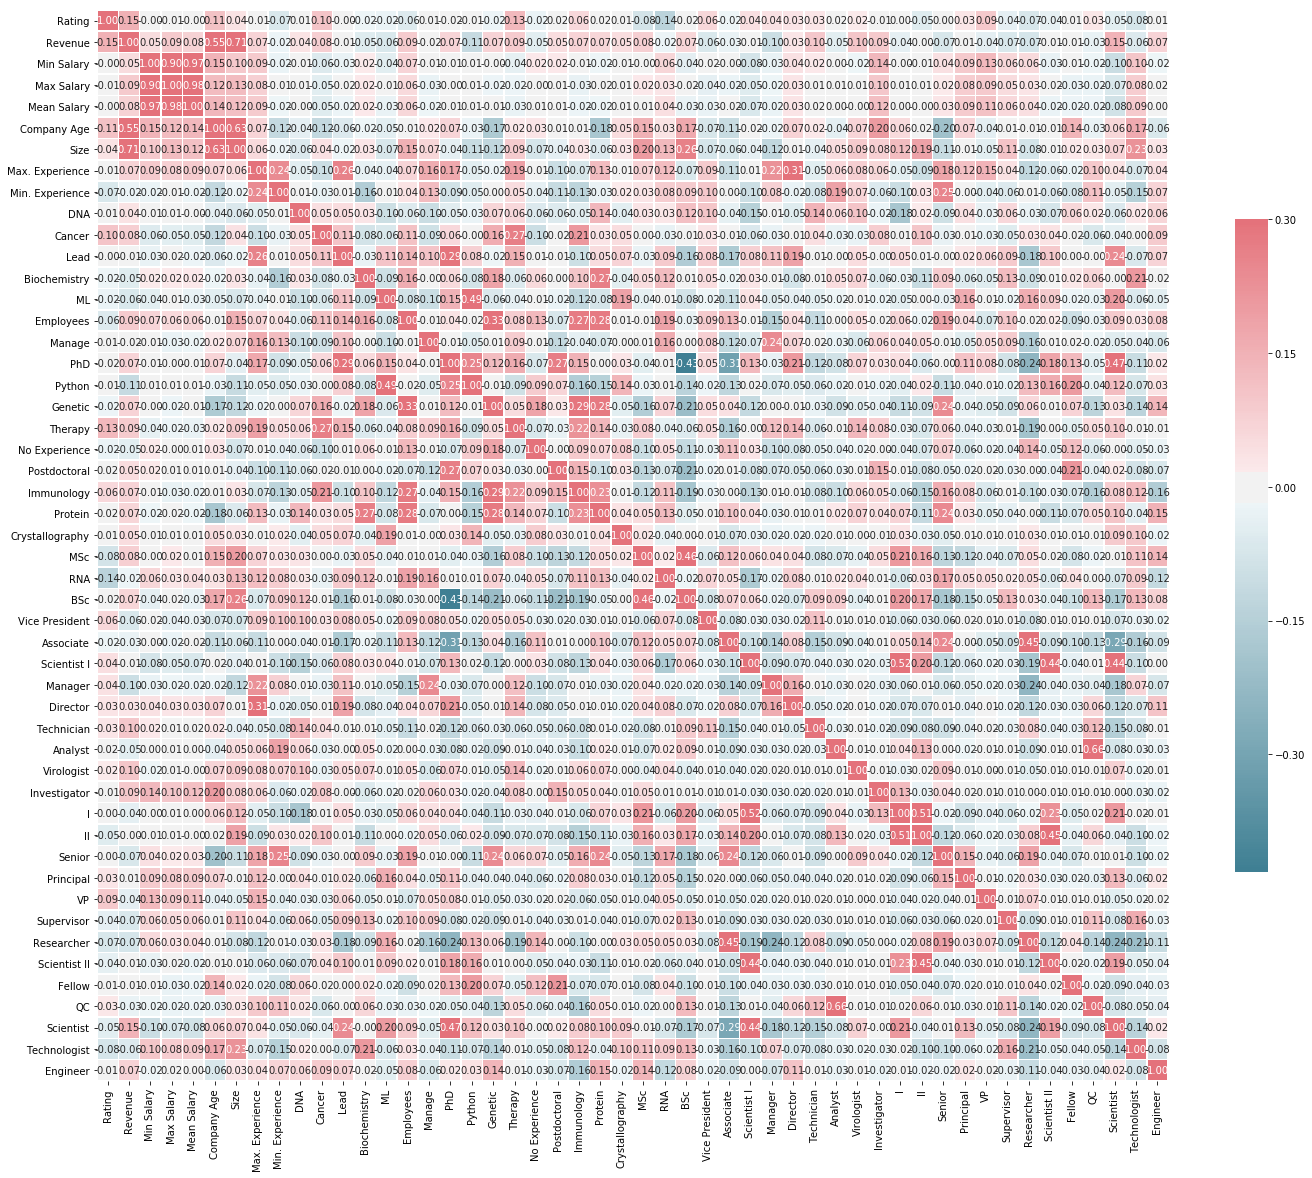

In [27]:
corr = glassdoorDBFinal2.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(24,24))
# Draw the heatmap with the mask and correct aspect ratio
corrMap = sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='0.2f')

In [29]:
#Drop last columns
glassdoorDBFinal2.drop(columns = ['Job Title', 'Job Description'], inplace=True)

In [30]:
glassdoorDBFinal2.to_csv("/Users/kershtheva/Desktop/Data Science Projects/DS Project 1 Repo/gDB(Cleanup2).csv")